In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 5000)
pd.set_option('display.max_rows', 1000)

from IPython.display import display, HTML

In [68]:
orders_items_cust_sellers_latlong_dist_dim_name_df = pd.read_csv('../data/orders_items_cust_sellers_latlong_dist_dim_name.csv')

### Calculate product volume, convert into required units

#### Convert product weight from grams to kilograms

In [69]:
orders_items_cust_sellers_latlong_dist_dim_name_df['product_weight_kgs'] = orders_items_cust_sellers_latlong_dist_dim_name_df['product_weight_g']/1000

#### Calculate volume in cubic meters|

In [70]:
orders_items_cust_sellers_latlong_dist_dim_name_df['product_volume_cubic_mts'] = (orders_items_cust_sellers_latlong_dist_dim_name_df['product_length_cm'] * orders_items_cust_sellers_latlong_dist_dim_name_df['product_height_cm'] * orders_items_cust_sellers_latlong_dist_dim_name_df['product_width_cm'])/1000000
orders_items_cust_sellers_latlong_dist_dim_name_df.to_csv('../data/orders_items_cust_sellers_latlong_dist_dim_name_kgwt_cubicmtvol.csv', index=False)

### Divide the dataset into 2 sets: Oct 2016 - Sept 2017; Oct 2017-Aug 2018

In [71]:
print(list(orders_items_cust_sellers_latlong_dist_dim_name_df))

['order_id', 'customer_id_for_order', 'order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'customer_unique_id', 'customer_zip_code_prefix', 'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'customer_lat', 'customer_long', 'seller_lat', 'seller_long', 'cust_lat_long', 'seller_lat_long', 'seller_cust_geo_dist', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category', 'product_weight_kgs', 'product_volume_cubic_mts']


In [72]:
print(orders_items_cust_sellers_latlong_dist_dim_name_df.dtypes)

order_id                         object
customer_id_for_order            object
order_status                     object
order_purchase_timestamp         object
order_delivered_carrier_date     object
customer_unique_id               object
customer_zip_code_prefix          int64
order_item_id                     int64
product_id                       object
seller_id                        object
seller_zip_code_prefix            int64
customer_lat                    float64
customer_long                   float64
seller_lat                      float64
seller_long                     float64
cust_lat_long                    object
seller_lat_long                  object
seller_cust_geo_dist            float64
product_weight_g                float64
product_length_cm               float64
product_height_cm               float64
product_width_cm                float64
product_category                 object
product_weight_kgs              float64
product_volume_cubic_mts        float64


#### Obtain only date from 'order_approved_at', 'order_delivered_carrier_date' timestamps

In [73]:
from datetime import datetime, timedelta

In [74]:
## order_approved_at - convert to datetime object
orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_timestamp'] = [datetime.strptime(d, "%m/%d/%y %H:%M") for d in orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_timestamp']]
orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_date'] = [datetime.date(d) for d in orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_timestamp']]
print(orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_date'] .head())

0    2017-09-18
1    2018-02-03
2    2017-11-30
3    2018-08-26
4    2018-08-26
Name: order_purchase_date, dtype: object


In [75]:
## order_delivered_carrier_date - convert to datetime object
orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date'] = [datetime.strptime(d, "%m/%d/%y %H:%M") for d in orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date']]
orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date'] = [datetime.date(d) for d in orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date']]
print(orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date'])

0       2017-10-06
1       2018-02-05
2       2017-12-04
3       2018-08-28
4       2018-08-28
           ...    
4645    2018-06-27
4646    2018-06-12
4647    2018-04-05
4648    2018-08-29
4649    2018-06-01
Name: order_delivered_carrier_date, Length: 4650, dtype: object


#### We have date from 10/04/2016 (order approved; order delivered carrier – 10/11/2016) to 08/29/2018 (both) 

In [76]:
orders_items_cust_sellers_latlong_dist_dim_name_df.drop('order_purchase_timestamp', axis=1, inplace=True)
orders_items_cust_sellers_latlong_dist_dim_name_df.to_csv('../data/orders_items_cust_sellers_latlong_dist_dim_name_date.csv', index=False)

In [77]:
# set order_approved_date as index for easy subsetting and analysis based on dates
# first convert ordered_approved_date to datetime from object
orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_date'] = pd.to_datetime(orders_items_cust_sellers_latlong_dist_dim_name_df['order_purchase_date'])
orders_items_cust_sellers_latlong_dist_dim_name_df = orders_items_cust_sellers_latlong_dist_dim_name_df.set_index(['order_purchase_date']).sort_index()

In [78]:
# to display dataframe as a table
print(display(HTML(orders_items_cust_sellers_latlong_dist_dim_name_df.head().to_html())))

,order_id,customer_id_for_order,order_status,order_delivered_carrier_date,customer_unique_id,customer_zip_code_prefix,order_item_id,product_id,seller_id,seller_zip_code_prefix,customer_lat,customer_long,seller_lat,seller_long,cust_lat_long,seller_lat_long,seller_cust_geo_dist,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,product_weight_kgs,product_volume_cubic_mts
order_purchase_date,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-04,98974b076b01553d49ee6467905675a7,dc7cdb748679fb6f280f66d7582c5e59,delivered,2016-11-11,eeb1b66fee35b3f1e3dfc27ff80fc0a2,4024,1,ecf23a6c1689e2bed38171ececac6138,5b179e9e8cc7ab6fd113a46ca584da81,5424,-23.603000,-46.644563,-23.571258,-46.696331,"(-23.6030004, -46.64456276)","(-23.57125772, -46.69633123)",6.346815,1700.0,16.0,17.0,17.0,housewares,1.70,0.004624
2016-10-04,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,delivered,2016-11-11,88bc832f104b6dd684a17dbb1b76e778,2993,1,29bedbfbe73ea473396306b4f0c010ec,5b179e9e8cc7ab6fd113a46ca584da81,5424,-23.454810,-46.735505,-23.571258,-46.696331,"(-23.45481034, -46.73550457)","(-23.57125772, -46.69633123)",13.503005,7600.0,55.0,33.0,40.0,housewares,7.60,0.072600
2016-10-04,c4b41c36dd589e901f6879f25a74ec1d,4bb880cac21c7a9e1371ab1ebd601706,delivered,2016-11-07,3f4f614c632af7fc7508462a7cb55ac2,5007,1,9e93b2c4cb5eea05e75a481c129b104d,ce27a3cc3c8cc1ea79d11e561e9bebb6,3006,-23.537129,-46.668479,-23.543136,-46.623716,"(-23.53712947, -46.66847945)","(-23.54313597, -46.62371555)",4.619000,300.0,16.0,3.0,11.0,auto,0.30,0.000528
2016-10-04,6b3ee7697a02619a0ace2b3f0aa46bde,21a6abdf0197fbe57451bd0a1d3c59a2,delivered,2016-11-07,5fc74f8947fe099b44a20bde30661d83,3683,1,4c7d4a2efde21e3bf1660926fabc6a9d,ce27a3cc3c8cc1ea79d11e561e9bebb6,3006,-23.517801,-46.478148,-23.543136,-46.623716,"(-23.51780055, -46.478148100000006)","(-23.54313597, -46.62371555)",15.127497,250.0,18.0,10.0,15.0,health_beauty,0.25,0.002700
2016-10-06,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-14,24c0806a2407ad1f14b1323849bd246c,2044,1,1949890685a12526806e9463ba1a3964,c12d7463a579237ffb9248bd7cff378b,8275,-23.495681,-46.618947,-23.577140,-46.482762,"(-23.49568082, -46.61894671)","(-23.57714001, -46.48276229)",16.576303,100.0,16.0,16.0,16.0,fashion_bags_accessories,0.10,0.004096


None


In [79]:
print(orders_items_cust_sellers_latlong_dist_dim_name_df.index.dtype)

datetime64[ns]


In [80]:
#Should have exact dates otherwise throws a key error
br_ecomm_jan17_dec17 = orders_items_cust_sellers_latlong_dist_dim_name_df.loc['2017-01-16':'2017-12-31']
br_ecomm_jan17_dec17.reset_index().to_csv('../data/br_ecomm_jan17_dec17.csv', index=False)

br_ecomm_oct16_sep17 = orders_items_cust_sellers_latlong_dist_dim_name_df.loc['2016-10-04':'2017-09-30']
br_ecomm_oct16_sep17.reset_index().to_csv('../data/br_ecomm_oct16_sep17.csv', index=False)

br_ecomm_oct17_aug18 = orders_items_cust_sellers_latlong_dist_dim_name_df.loc['2017-10-01':'2018-08-29']
br_ecomm_oct17_aug18.reset_index().to_csv('../data/br_ecomm_oct17_aug18.csv', index=False)

### Get number of orders purchased by day

In [81]:
orders_purchased_by_date = orders_items_cust_sellers_latlong_dist_dim_name_df.groupby(orders_items_cust_sellers_latlong_dist_dim_name_df.index)['order_id'].count()
# series
print(orders_purchased_by_date)

order_purchase_date
2016-10-04     4
2016-10-06     2
2016-10-07     3
2016-10-08     5
2016-10-09     1
2017-01-16     1
2017-01-18     1
2017-01-19     4
2017-01-22     1
2017-01-23     4
2017-01-24     1
2017-01-25     2
2017-01-26     7
2017-01-27     3
2017-01-29     1
2017-01-30     3
2017-01-31     1
2017-02-01     4
2017-02-02     1
2017-02-03     4
2017-02-04     2
2017-02-05     2
2017-02-06     3
2017-02-07     6
2017-02-08     3
2017-02-09     3
2017-02-10     2
2017-02-11     3
2017-02-12     1
2017-02-14     1
2017-02-15     3
2017-02-18     2
2017-02-19     4
2017-02-20     1
2017-02-21     4
2017-02-22     4
2017-02-23     5
2017-02-24     4
2017-02-25     1
2017-02-26     4
2017-02-27     5
2017-02-28     2
2017-03-01     7
2017-03-02     2
2017-03-03     4
2017-03-04     3
2017-03-05     6
2017-03-06     6
2017-03-07     3
2017-03-08     4
2017-03-09     6
2017-03-10     4
2017-03-11     1
2017-03-12     4
2017-03-13     1
2017-03-14     6
2017-03-15    10
2017-03-16 

In [82]:
print(orders_purchased_by_date.sort_values(ascending=False))

order_purchase_date
2017-11-24    50
2018-07-31    30
2018-05-15    26
2018-08-03    24
2017-07-16    23
2018-08-07    23
2018-08-08    22
2018-08-06    22
2018-01-30    22
2018-03-20    22
2018-01-23    22
2018-05-13    21
2018-06-13    21
2018-08-13    21
2018-04-20    21
2018-08-01    21
2018-08-23    21
2018-03-06    20
2018-04-25    20
2018-08-22    20
2018-05-18    20
2017-11-28    20
2018-07-10    19
2017-12-11    19
2017-11-22    19
2018-06-03    19
2018-07-05    19
2018-07-22    19
2018-05-16    19
2018-08-04    19
2018-01-18    19
2018-01-17    19
2018-03-23    19
2018-04-23    19
2018-08-16    19
2018-04-27    18
2018-02-27    18
2018-04-16    18
2018-07-23    18
2018-08-20    18
2017-12-12    18
2018-07-30    18
2018-05-04    18
2018-01-15    17
2018-08-15    17
2018-01-22    17
2018-06-25    17
2018-06-11    17
2018-05-21    17
2018-08-09    17
2018-07-20    17
2018-02-15    16
2018-03-08    16
2017-11-08    16
2018-07-25    16
2018-04-12    16
2018-04-11    16
2018-02-20 

### Get number of orders delivered by day

In [83]:
orders_delivered_by_date = orders_items_cust_sellers_latlong_dist_dim_name_df.groupby(orders_items_cust_sellers_latlong_dist_dim_name_df['order_delivered_carrier_date'])['order_id'].count()
print(orders_delivered_by_date.sort_values(ascending=False))

order_delivered_carrier_date
2018-07-10    37
2018-08-06    35
2018-08-09    35
2017-11-27    34
2018-08-27    33
2017-07-20    32
2018-08-10    31
2018-01-24    31
2018-04-30    29
2018-05-02    29
2018-06-04    29
2018-08-13    29
2018-07-31    27
2018-03-27    27
2018-08-28    27
2018-05-14    27
2018-08-21    27
2017-12-12    26
2018-01-19    26
2018-08-02    26
2018-05-21    25
2018-04-17    25
2018-07-24    25
2018-08-20    25
2017-11-22    25
2018-05-16    25
2018-04-23    25
2018-04-04    24
2017-11-24    24
2018-03-02    24
2018-07-23    24
2017-12-01    24
2018-06-20    23
2018-05-03    23
2018-08-29    23
2018-08-22    23
2018-05-07    22
2018-08-03    22
2018-07-11    22
2018-06-11    22
2018-06-12    22
2018-01-05    22
2018-01-09    22
2018-01-17    22
2017-11-28    22
2018-02-14    22
2018-06-18    22
2017-12-04    21
2018-07-26    21
2018-04-05    21
2018-02-16    21
2018-02-27    21
2017-12-05    21
2017-12-20    20
2018-08-16    20
2018-06-25    20
2018-05-23    20
20

### Group orders by month from Oct 4, 2016 - Aug 29, 2018

In [84]:
orders_by_month = orders_items_cust_sellers_latlong_dist_dim_name_df.resample('M')['order_id'].count()
print(orders_by_month.sort_values(ascending=False))
# print(orders_by_month)

order_purchase_date
2018-08-31    437
2018-04-30    364
2018-05-31    363
2018-07-31    360
2018-01-31    348
2018-03-31    334
2018-06-30    313
2017-11-30    313
2017-12-31    280
2018-02-28    265
2017-10-31    177
2017-08-31    171
2017-09-30    168
2017-07-31    165
2017-05-31    152
2017-06-30    134
2017-03-31    114
2017-04-30     74
2017-02-28     74
2017-01-31     29
2016-10-31     15
2016-12-31      0
2016-11-30      0
Name: order_id, dtype: int64


#### Utility function to plot orders over time (16-18)

In [85]:
# plot_title = "Orders' Trends by Month - Jan 17 to Dec 17",
def plot_orders(df, plot_type, x_label, y_label, years, plot_title):
    # Set custom ticks coz by default its displaying date+time format not just date on x-axis
    # Do for y axis also coz displaying far away numbers
    
    orders = [50, 100, 150, 200, 250, 300, 350, 400, 450]
    orders_pos = [50, 100, 150, 200, 250, 300, 350, 400, 450]
    
    if years == '16-18':       
        dates = ('10/31/16', '11/30/16', '12/31/16', '1/31/17', '2/28/17', '3/31/17', '4/30/17',
                  '5/31/17', '6/30/17', '7/31/17', '8/31/17', '9/30/17', '10/31/17', '11/30/17', 
                  '12/31/17', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18', '6/30/18', 
                  '7/31/18', '8/31/18')
        
        
    elif years == '16-17':
        dates = ('10/31/16', '11/30/16', '12/31/16', '1/31/17', '2/28/17', '3/31/17', '4/30/17',
                  '5/31/17', '6/30/17', '7/31/17', '8/31/17', '9/30/17')
        orders = [25, 50, 75, 100, 125, 150, 175, 200]
        orders_pos = [25, 50, 75, 100, 125, 150, 175, 200]
        
    elif years == '17-18':
        dates = ('10/31/17', '11/30/17', '12/31/17', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18', '6/30/18', 
                  '7/31/18', '8/31/18')
        
    elif years == '17':
        dates = ('1/31/17', '2/28/17', '3/31/17', '4/30/17', '5/31/17', '6/30/17', '7/31/17', '8/31/17', '9/30/17', '10/31/17', '11/30/17', '12/31/17')
        orders = [50, 100, 150, 200, 250, 300, 350]
        orders_pos = [50, 100, 150, 200, 250, 300, 350]
            
    dates_pos = np.arange(len(dates))
        

    plt.figure(figsize=(14,8))
    
    if plot_type == 'bar':
        df.plot.bar()

    if plot_type == 'line':
        plt.figure(figsize=(14,8))

        plt.plot(df)

        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.xlabel(f"{x_label}", fontsize=14)
        plt.ylabel(f"{y_label}", fontsize=14)

        plt.title(f'{plot_title}', fontsize=14)

        plt.show()
        
        return
        
    plt.xticks(dates_pos, dates, fontsize=12, rotation=45)
    plt.yticks(orders_pos, orders, fontsize=12)

    plt.xlabel(f"{x_label}", fontsize=14)
    plt.ylabel(f"{y_label}", fontsize=14)

    plt.title(f'{plot_title}', fontsize=14)

    plt.show()

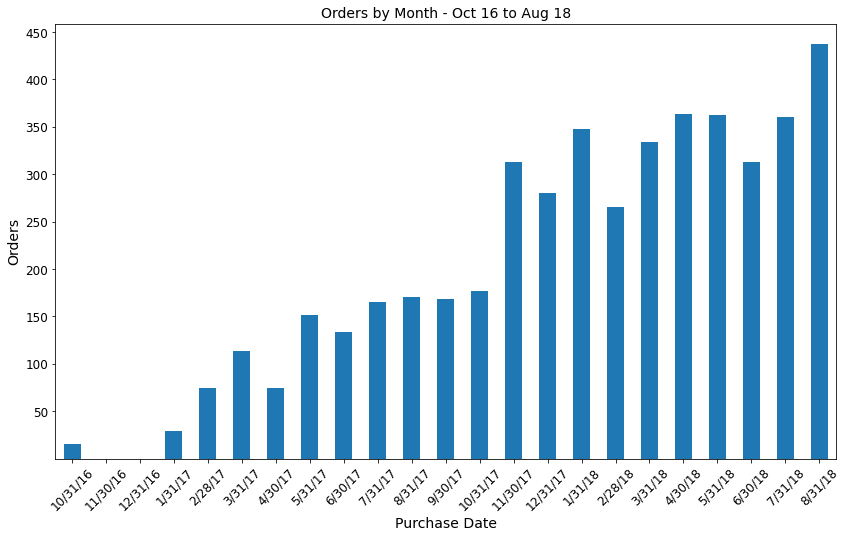

In [86]:
plot_orders(orders_by_month, plot_type='bar', 
            plot_title = 'Orders by Month - Oct 16 to Aug 18',
            x_label='Purchase Date',
            y_label='Orders',
            years='16-18')

<Figure size 1008x576 with 0 Axes>

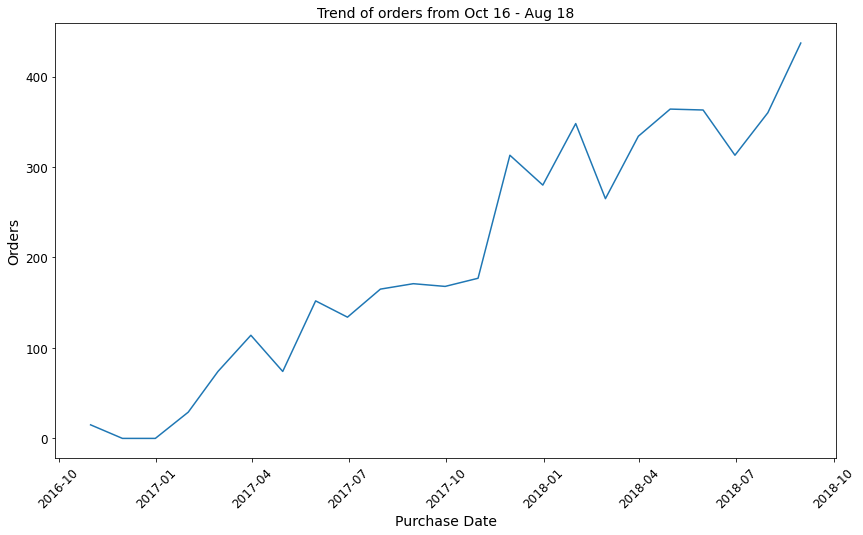

In [87]:
plot_orders(orders_by_month, plot_type='line', 
            plot_title = 'Trend of orders from Oct 16 - Aug 18',
            x_label='Purchase Date',
            y_label='Orders',
            years='16-18')

### Product category sales by volume

In [88]:
def get_grp_by_percentile(df, grp_by):
    grpd_srs = df.groupby(f'{grp_by}')['order_id'].count()
    grpd_srs = grpd_srs.sort_values(ascending=False)
    
    grpd_df = pd.DataFrame(grpd_srs).reset_index()
    grpd_df.rename(columns={'order_id': 'num_of_orders'}, inplace=True)
    grpd_df['perc'] = (grpd_df['num_of_orders']/grpd_df['num_of_orders'].sum())*100
    print(grpd_df.head(10))

### Group orders by month from Oct 04, 2016 - Sep 30, 2017

In [89]:
br_ecomm_oct16_sep17_month = br_ecomm_oct16_sep17.resample('M')['order_id'].count()
br_ecomm_oct16_sep17_month.sort_values(ascending=False)

order_purchase_date
2017-08-31    171
2017-09-30    168
2017-07-31    165
2017-05-31    152
2017-06-30    134
2017-03-31    114
2017-04-30     74
2017-02-28     74
2017-01-31     29
2016-10-31     15
2016-12-31      0
2016-11-30      0
Name: order_id, dtype: int64

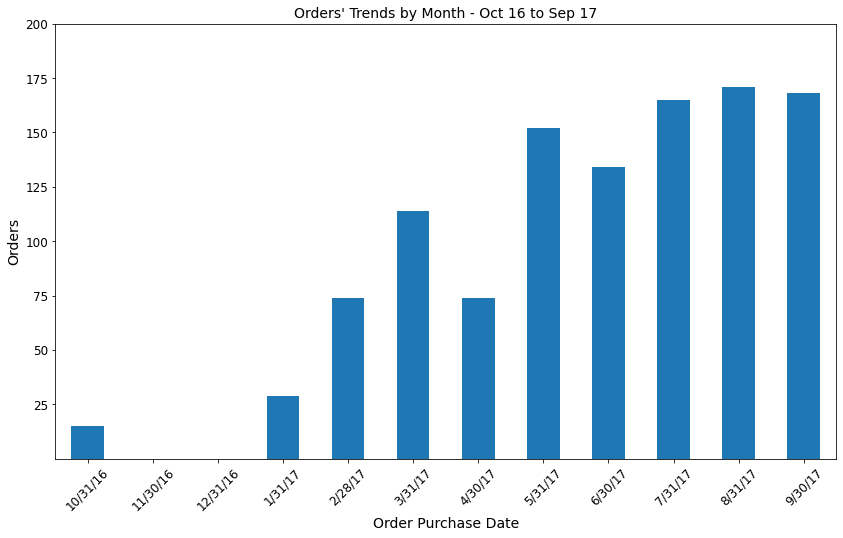

In [90]:
plot_orders(br_ecomm_oct16_sep17_month, plot_type='bar', 
            plot_title = "Orders' Trends by Month - Oct 16 to Sep 17",
            x_label='Order Purchase Date',
            y_label = 'Orders',
            years='16-17')

<Figure size 1008x576 with 0 Axes>

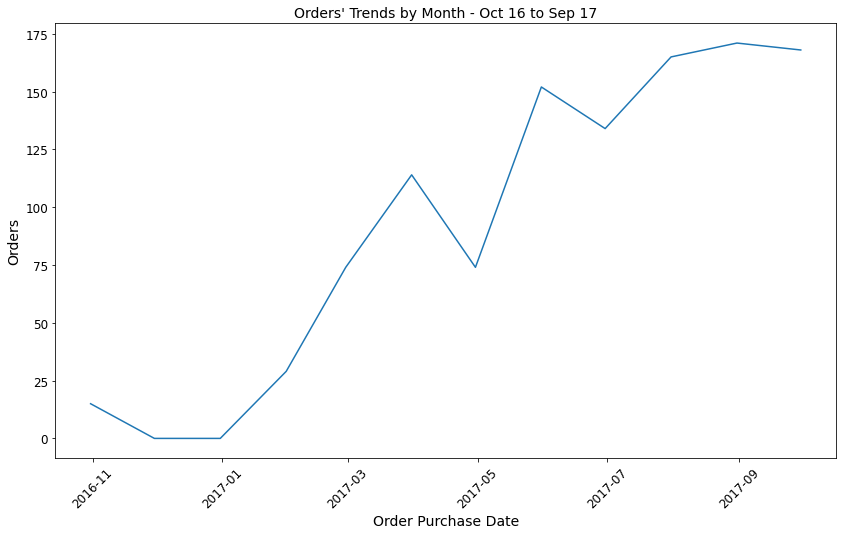

In [91]:
plot_orders(br_ecomm_oct16_sep17_month, plot_type='line', 
            plot_title = "Orders' Trends by Month - Oct 16 to Sep 17",
            x_label='Order Purchase Date',
            y_label='Orders',
            years='16-17')

### Group orders by month from Oct 01, 2017 - Aug 29, 2018

In [92]:
br_ecomm_oct17_aug18_month = br_ecomm_oct17_aug18.resample('M')['order_id'].count()
br_ecomm_oct17_aug18_month.sort_values(ascending=False)

order_purchase_date
2018-08-31    437
2018-04-30    364
2018-05-31    363
2018-07-31    360
2018-01-31    348
2018-03-31    334
2018-06-30    313
2017-11-30    313
2017-12-31    280
2018-02-28    265
2017-10-31    177
Name: order_id, dtype: int64

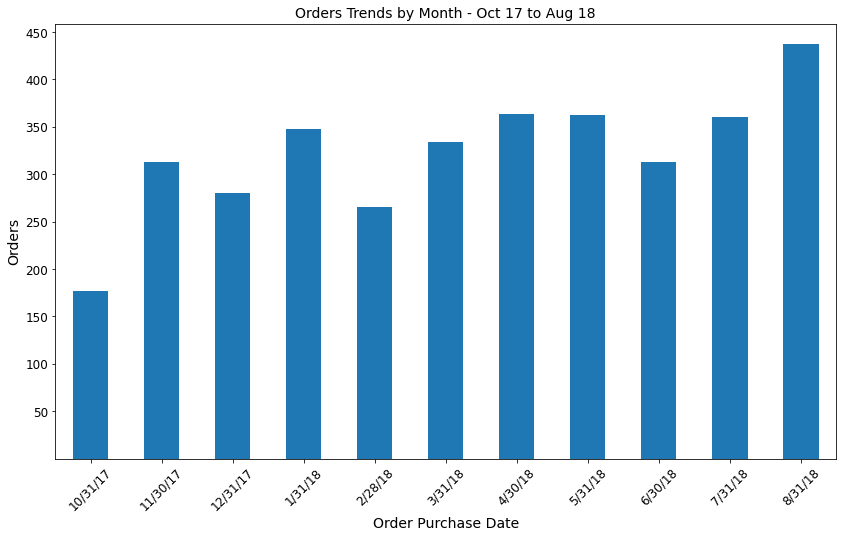

In [93]:
plot_orders(br_ecomm_oct17_aug18_month, plot_type='bar', 
            plot_title = 'Orders Trends by Month - Oct 17 to Aug 18',
            x_label='Order Purchase Date',
            y_label='Orders',
            years='17-18')

<Figure size 1008x576 with 0 Axes>

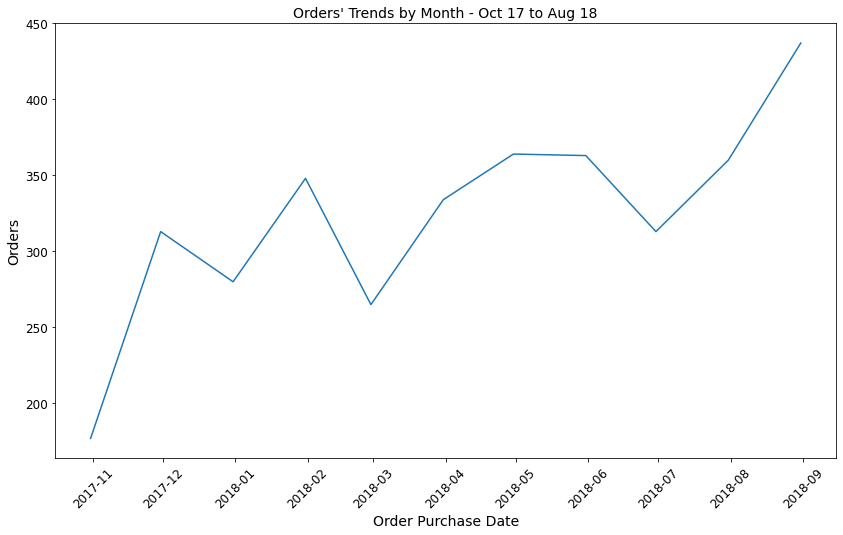

In [94]:
plot_orders(br_ecomm_oct17_aug18_month, plot_type='line', 
            plot_title = "Orders' Trends by Month - Oct 17 to Aug 18",
            x_label='Order Purchase Date',
            y_label='Orders',
            years='17-18')

### Group orders by month from Jan 16, 2017 to Dec 31, 2017

In [95]:
br_ecomm_jan17_dec17_month = br_ecomm_jan17_dec17.resample('M')['order_id'].count()
br_ecomm_jan17_dec17_month.sort_values(ascending=False)

order_purchase_date
2017-11-30    313
2017-12-31    280
2017-10-31    177
2017-08-31    171
2017-09-30    168
2017-07-31    165
2017-05-31    152
2017-06-30    134
2017-03-31    114
2017-04-30     74
2017-02-28     74
2017-01-31     29
Name: order_id, dtype: int64

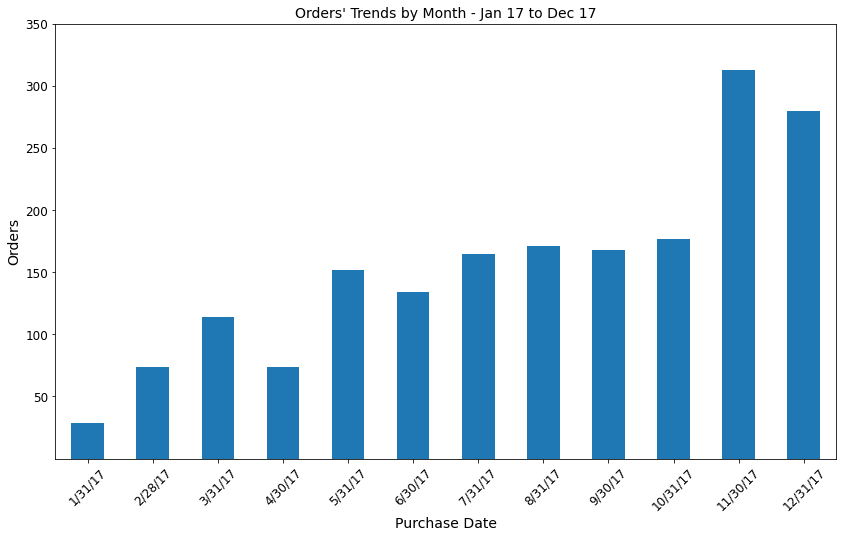

In [96]:
plot_orders(br_ecomm_jan17_dec17_month, plot_type='bar', 
            plot_title = "Orders' Trends by Month - Jan 17 to Dec 17",
            x_label='Purchase Date',
            y_label='Orders',
            years='17')

<Figure size 1008x576 with 0 Axes>

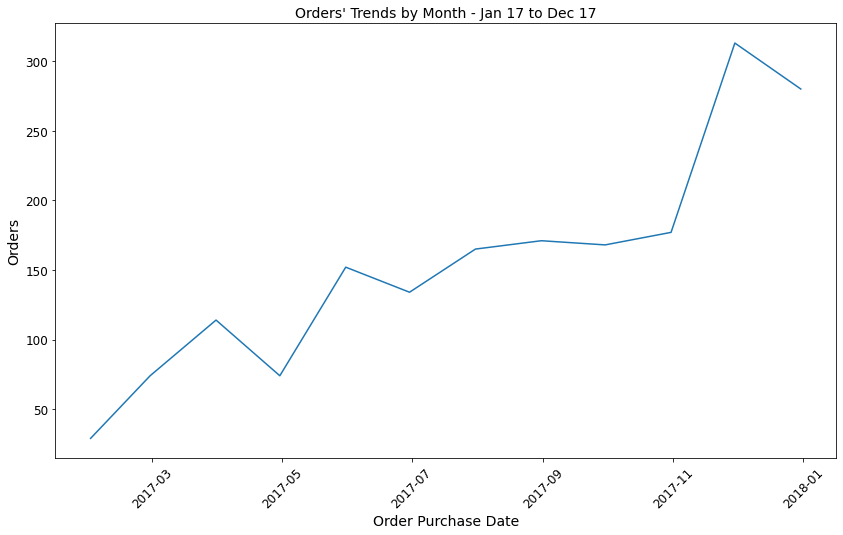

In [97]:
plot_orders(br_ecomm_jan17_dec17_month, plot_type='line', 
            plot_title = "Orders' Trends by Month - Jan 17 to Dec 17",
            x_label='Order Purchase Date',
            y_label='Orders',
            years='17')

### Plot monthly graphs for 2017 to see which days record higher shopping approaching holiday dates

In [98]:
print(type(br_ecomm_jan17_dec17_month))
br_ecomm_jan17_dec17_grpd_month = br_ecomm_jan17_dec17.groupby(br_ecomm_jan17_dec17.index.month)
print(type(br_ecomm_jan17_dec17_grpd_month))

<class 'pandas.core.series.Series'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


### Get the daily trends for 2017

#### Utility function to plot daily trends

In [99]:
def get_daily_trends(qtr):
    plt.figure(figsize=(14,8))
    
    if qtr == 'all':
        start = 0
        end = 12
        
    elif qtr == 'first':
        start = 0
        end = 3
        
    elif qtr == 'second':
        start = 3
        end = 6
        
    elif qtr == 'third':
        start = 6
        end = 9
        
    elif qtr == 'fourth':
        start = 9
        end = 12
    
    for name, group in list(br_ecomm_jan17_dec17_grpd_month)[start:end]:
        day_grp = group.groupby(group.index.day)['order_id'].count()

        day_grp.plot(label=name)

        plt.legend() 
        plt.xlabel('Day of the month')
        plt.ylabel('Number of orders')
        
        plt.savefig('/Users/salma/Research/papers/e-commerce/brazilian_e-commerce_data/brazilian_e-commerce_dataset_analysis/analysis')

### Get the daily trends for all the 12 months of 2017

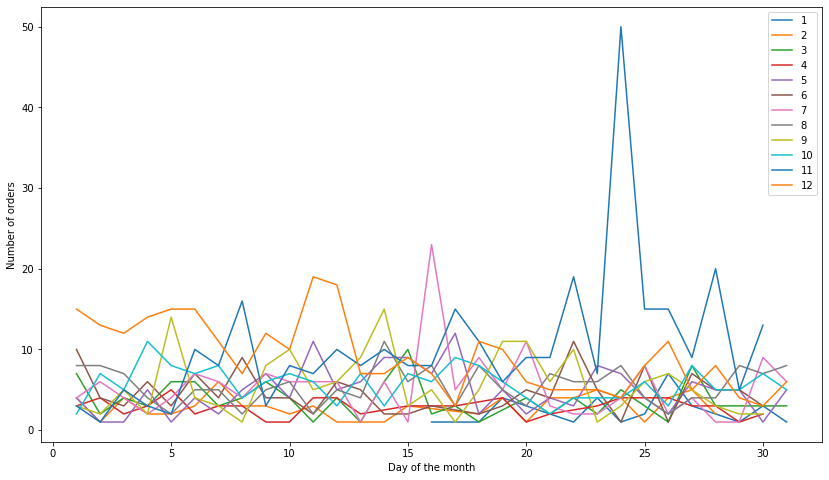

In [100]:
get_daily_trends(qtr='all')

### Get the daily trends for 1st qtr of 2017 (Jan - Mar)
1. January
    1. post holiday discounts
    2. summer travel/vacation
    
2. March
    1. International Women’s Day, March 8
    2. Consumer’s Day, March 15 

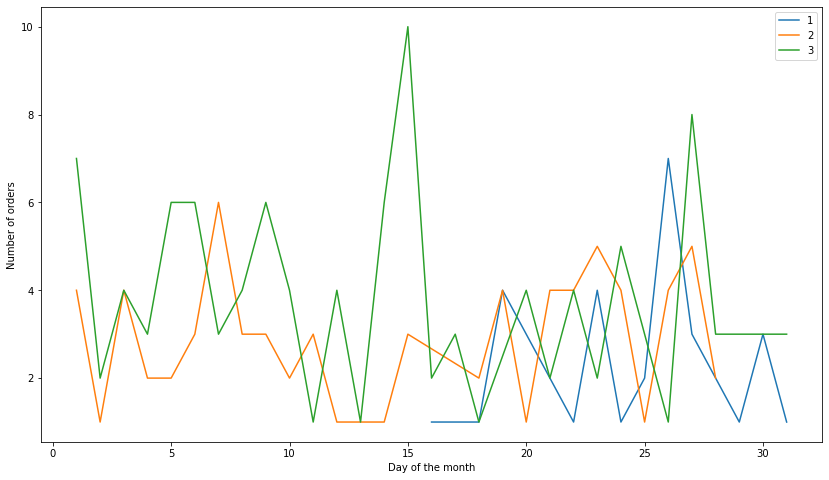

In [101]:
get_daily_trends(qtr='first')

### Get the daily trends for 2nd qtr of 2017 (Apr - Jun)
1. April
    1. Free shipping day - last friday of april
2. May
    2. Mother's day - 2nd sunday of may
    3. Retail companies usually start preparations for this holiday one month before the actual day

3. June
    1. Valentine's Day - June 12

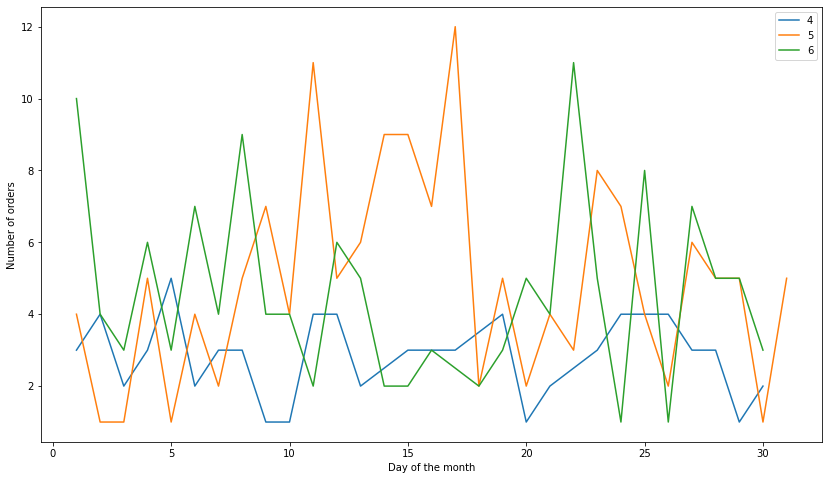

In [102]:
get_daily_trends(qtr='second')

### Get the daily trends for 3rd qtr of 2017 (Jul - Sep)
1. July
    1. Father’s Day promotions usually start on the first week of July
    
2. August
    1. Father's Day - 2nd Sunday of August
    
3. Septmeber
    1. Brazilian families start their Children’s Day shopping around September 28 

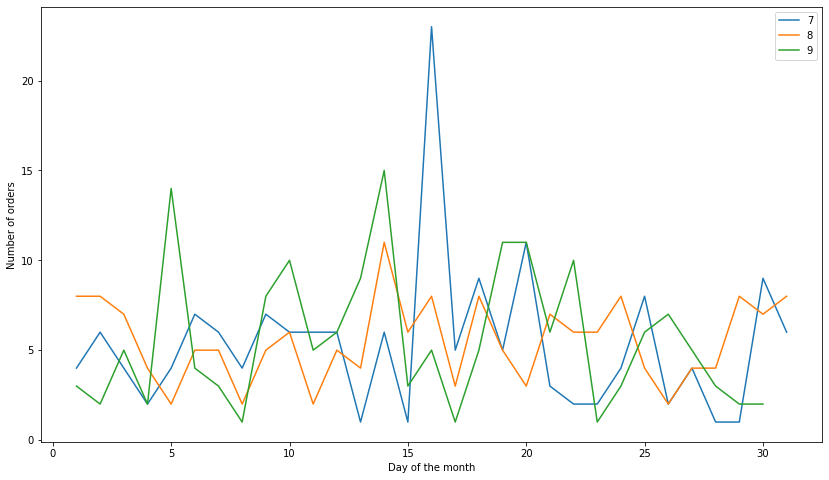

In [103]:
get_daily_trends(qtr='third')

### Get the daily trends for 4th qtr of 2017 (Oct - Dec)
1. October
    1. Children's Day - October 12

2. November
    1. Black Friday
    2. Cyber Monday
    3. Start offers early in November to take full advantage of the date’s potential 
    4. First 60% of the 13th paycheck gets distributed around November 20th
    
3. December
    1. Christmas
    2. Vacation spending
    3. Last 40% of the 13th paycheck gets distributed around December 10th

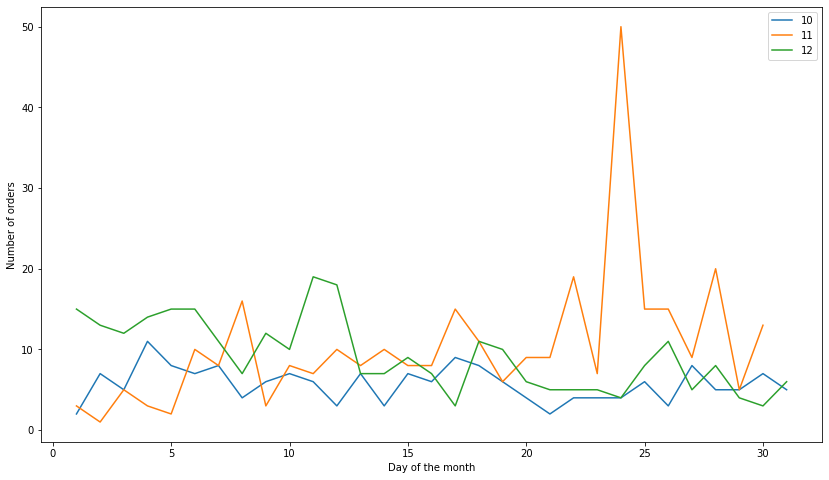

In [104]:
get_daily_trends(qtr='fourth')

### Get daily trends by each month

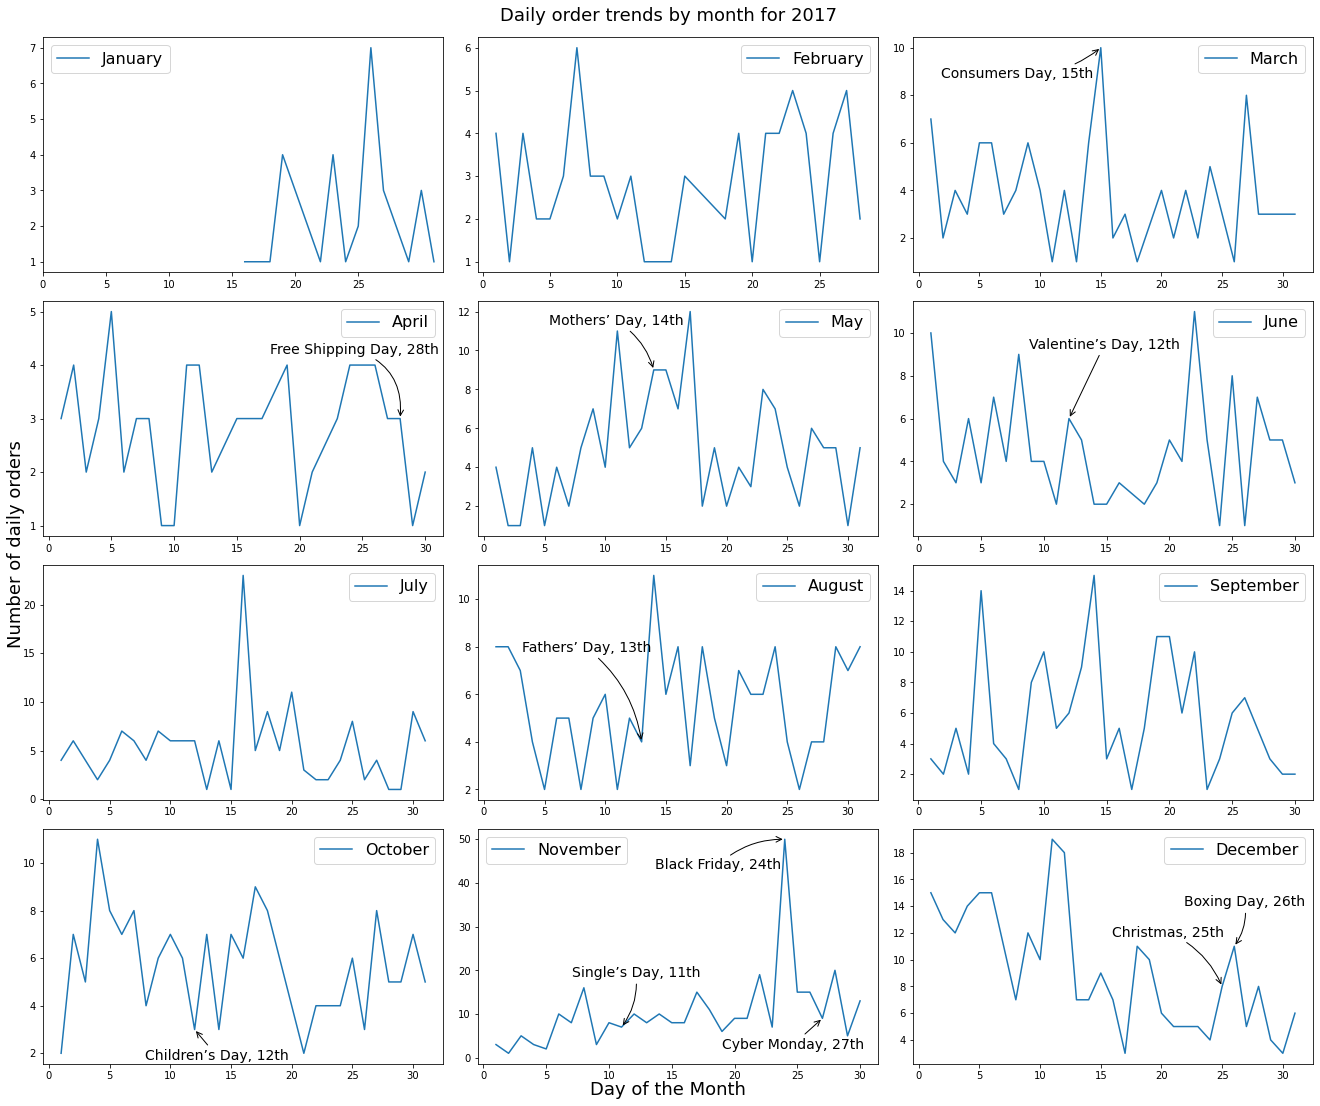

In [105]:
fig, axs = plt.subplots(4, 3, figsize=(18,15), constrained_layout=True)
fig.suptitle('Daily order trends by month for 2017', fontsize=18)

# Set common x and y labels
fig.text(0.5, -0.01, 'Day of the Month', ha='center', fontsize=18)
fig.text(-0.01, 0.5, 'Number of daily orders', va='center', rotation='vertical', fontsize=18)

# months list to use for labeling sub-plots
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# important e-commerce boosting holidays in Brazil, 2017
"""
Popular e-commerce day for 2017:

Consumers Day	15-Mar	3/15/17
Free Shipping Day	last Friday of April	4/28/17
Mothers’ Day	2nd Sunday of May	5/14/17
Valentine’s Day	June 12th	6/12/17
Fathers’ Day	2nd Sunday of August	8/13/17
Children’s Day	October 12th	10/12/17
Chinese Double Eleven, or Single’s Day	November 11th	11/11/17
Black Friday	Friday after thanksgiving	11/24/17
Cyber Monday --> Monday after thanksgiving --> 11/27/17
Christmas	25-Dec	12/25/17
Boxing Day	26-Dec	12/26/17
"""

hldy_dates = ['3/15/17', '4/28/17', '5/14/17', '6/12/17', '8/13/17', '10/12/17', '11/11/17', '11/24/17', '11/27/17',
             '12/25/17', '12/26/17']

# Get the orders on these ecommerce shopping days to annotate on the sub-plots
hldy_shpng_orders = {}

for hldy_date in hldy_dates:
    hldy_shpng_orders[hldy_date] = br_ecomm_jan17_dec17.loc[f'{hldy_date}'].shape[0]

    
# to hold the groups obtained after grouping br_ecomm_jan17_dec17_grpd_month by month
groups_dict = {}

# iterate over grouped result dfs and append each to groups_list
for name, group in list(br_ecomm_jan17_dec17_grpd_month):
        groups_dict[name] = group

# counter to loop through groups_dict
grp_num = 1

# counter to keep track of horizontal axis for subplots
hori = 0

while hori < 4:
    # counter to keep track of vertical axis for subplots. 
    # vert has to start from 0 for each row
    vert = 0
    while vert < 3 :
        day_grp = groups_dict[grp_num].groupby(groups_dict[grp_num].index.day)['order_id'].count()
        axs[hori, vert].plot(day_grp, label=months[grp_num-1])
        axs[hori, vert].legend(fontsize=16)
        
        # Add holiday labels to the plot
        if grp_num == 3:
            axs[hori, vert].annotate("Consumers Day, 15th", xy=(15, hldy_shpng_orders['3/15/17']), xycoords='data',
                                    xytext=(-160, -30), textcoords='offset points', size=14,
                                    arrowprops=dict(arrowstyle="->",
                                                   connectionstyle="arc3,rad=0.2"))
        if grp_num == 4:
            axs[hori, vert].annotate("Free Shipping Day, 28th", xy=(28, hldy_shpng_orders['4/28/17']), xycoords='data',
                            xytext=(-130, 65), textcoords='offset points', size=14,
                            arrowprops=dict(arrowstyle="->",
                                           connectionstyle="arc3,rad=-0.4"))
            
        if grp_num == 5:
            axs[hori, vert].annotate("Mothers’ Day, 14th", xy=(14, hldy_shpng_orders['5/14/17']), xycoords='data',
                            xytext=(-105, 45), textcoords='offset points', size=14,
                            arrowprops=dict(arrowstyle="->",
                                           connectionstyle="arc3,rad=-0.2"))
        if grp_num == 6:
            axs[hori, vert].annotate("Valentine’s Day, 12th", xy=(12, hldy_shpng_orders['6/12/17']), xycoords='data',
                        xytext=(-40, 70), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->")) 
        if grp_num == 8:
            axs[hori, vert].annotate("Fathers’ Day, 13th", xy=(13, hldy_shpng_orders['8/13/17']), xycoords='data',
                        xytext=(-120, 90), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->",
                                       connectionstyle="arc3,rad=-0.2"))
        if grp_num == 10:
            axs[hori, vert].annotate("Children’s Day, 12th", xy=(12, hldy_shpng_orders['10/12/17']), xycoords='data',
                        xytext=(-50, -30), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->"))
        
        if grp_num == 11:
            axs[hori, vert].annotate("Single’s Day, 11th", xy=(11, hldy_shpng_orders['11/11/17']), xycoords='data',
                        xytext=(-50, 50), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->",
                                       connectionstyle="arc3,rad=-0.2"))
            
            axs[hori, vert].annotate("Black Friday, 24th", xy=(24, hldy_shpng_orders['11/24/17']), xycoords='data',
                        xytext=(-130, -30), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->",
                                       connectionstyle="arc3,rad=-0.2"))
            
            axs[hori, vert].annotate("Cyber Monday, 27th", xy=(27, hldy_shpng_orders['11/27/17']), xycoords='data',
                        xytext=(-100, -30), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->"))
        
        
        if grp_num == 12:
            axs[hori, vert].annotate("Christmas, 25th", xy=(25, hldy_shpng_orders['12/25/17']), xycoords='data',
                        xytext=(-110, 50), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->",
                                       connectionstyle="arc3,rad=-0.2"))
            
            axs[hori, vert].annotate("Boxing Day, 26th", xy=(26, hldy_shpng_orders['12/26/17']), xycoords='data',
                        xytext=(-50, 40), textcoords='offset points', size=14,
                        arrowprops=dict(arrowstyle="->",
                                       connectionstyle="arc3,rad=-0.2"))
            
        grp_num += 1
        vert += 1
    hori += 1
    
#plt.xticks([0, 0, 2], [0, 5, 10, 15, 20, 25], color='red')

# x axis for jan was starting from 16th
# y axis for April had decimals

axs[0, 0].set_xticks([0, 5, 10, 15, 20, 25])
axs[1, 0].set_yticks([1, 2, 3, 4, 5])

plt.savefig('/Users/salma/Research/papers/e-commerce/brazilian_e-commerce_data/brazilian_e-commerce_dataset_analysis/analysis')

### Get a list of dfs where each df is for a specific ecommerce special day with data from 30 days prior to ecommerce special day

In [106]:
# dict to hold holiday dfs
hldy_dfs = []

# for nov and dec considering only 1 major holidays sine they would encompass any prior to that
hldy_dates = ['3/15/17', '4/28/17', '5/14/17', '6/12/17', '8/13/17', '10/12/17', '11/27/17', '12/26/17']

hldy_events_dict = ['Consumers Day, Mar 15', 'Free Shipping Day, Apr 28', "Mothers’ Day, May 14",
              "Valentine’s Day, June 12", "Fathers’ Day, Aug 13", "Children’s Day, Oct 12",
              'Singles, BF, CM - Nov', 'Christmas, Boxing - Dec']


#start_date = datetime.datetime.now() - datetime.timedelta(30)
for hldy_date in hldy_dates:
    # convert string index date to datetime for getting timedelta
    start_date = datetime.date(datetime.strptime(hldy_date, "%m/%d/%y"))
    end_date = datetime.date(datetime.strptime(hldy_date, "%m/%d/%y")-timedelta(days=30))

    # add 1 day to stat date since the original will. be non-inclusive during slicing
    start_date = start_date + timedelta(days=1)


    # convert datetime back to string to slice on the string date index
    start_date_str = start_date.strftime("%m/%d/%y")
    end_date_str = end_date.strftime("%m/%d/%y")
    
    hldy_df = br_ecomm_jan17_dec17.loc[end_date_str:start_date_str]
    
    hldy_dfs.append(hldy_df)

### Individual graph for each holiday - by taking 30 days prior data from each holiday

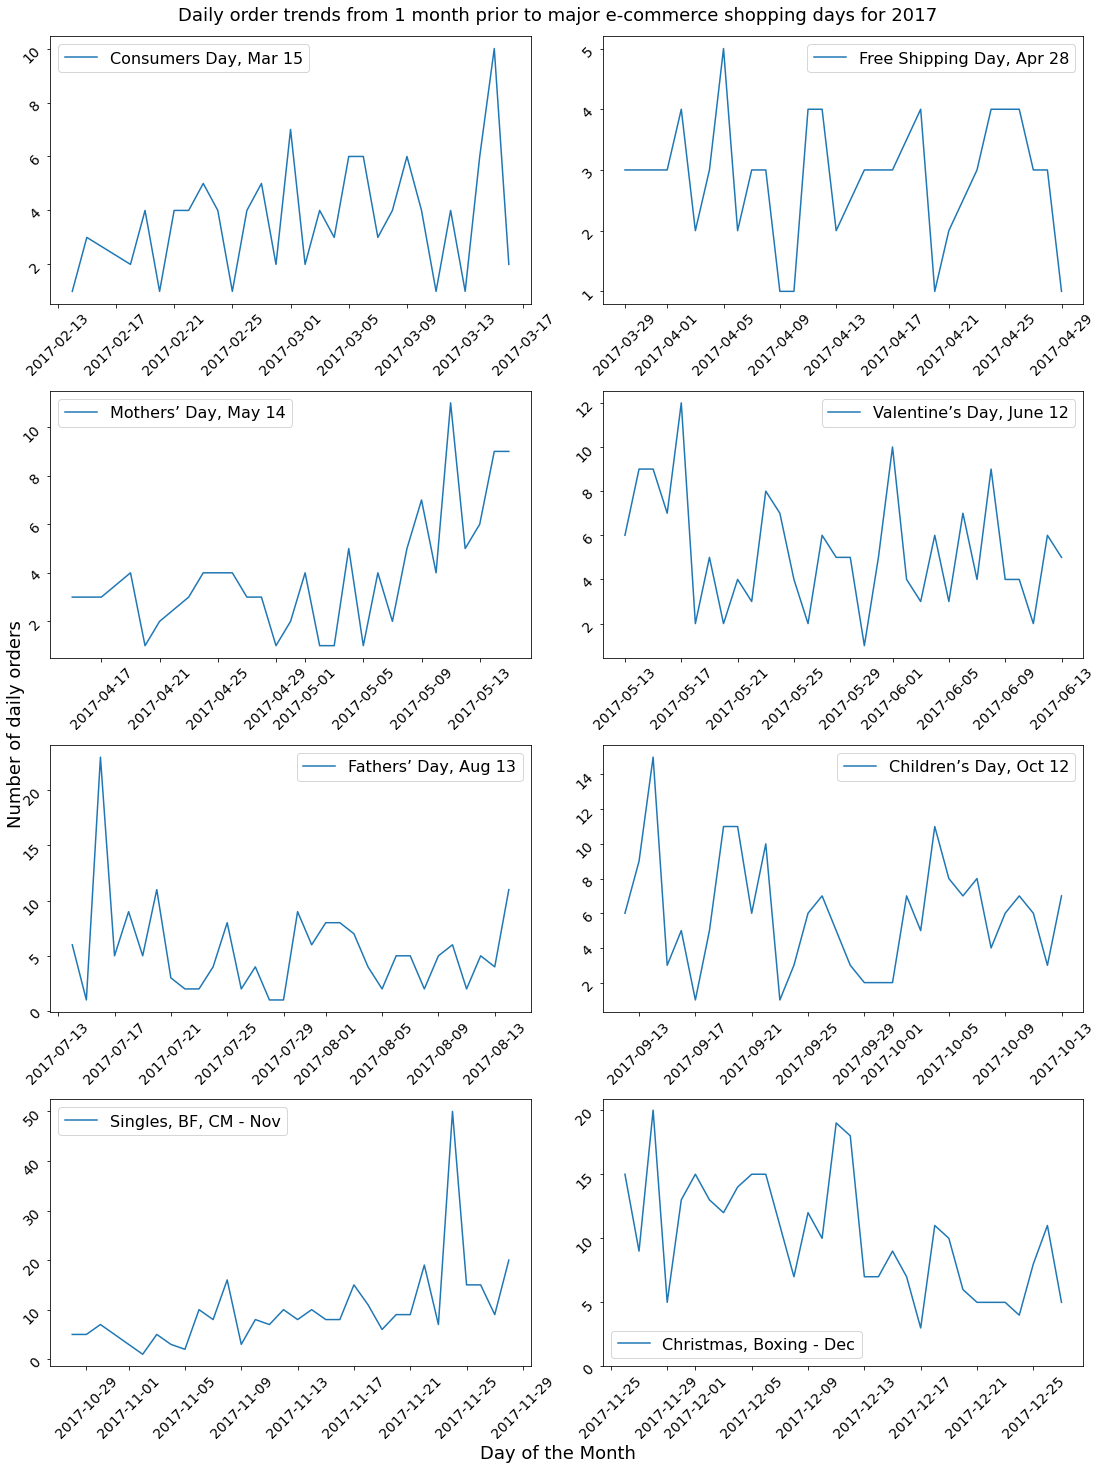

In [107]:
fig, axs = plt.subplots(4, 2, figsize=(15,20), constrained_layout=True)
fig.suptitle('Daily order trends from 1 month prior to major e-commerce shopping days for 2017', fontsize=18)

# Set common x and y labels
fig.text(0.5, -0.01, 'Day of the Month', ha='center', fontsize=18)
fig.text(-0.01, 0.5, 'Number of daily orders', va='center', rotation='vertical', fontsize=18)
    
# counter to loop through groups_dict
grp_num = 0    

# counter to keep track of horizontal axis for subplots
hori = 0

while hori < 4:
    # counter to keep track of vertical axis for subplots. 
    # vert has to start from 0 for each row
    vert = 0
    while vert < 2:
        day_grp = hldy_dfs[grp_num].groupby(hldy_dfs[grp_num].index)['order_id'].count()
        axs[hori, vert].plot(day_grp, label = hldy_events_dict[grp_num]) # label=months[grp_num-1]
        #axs[hori, vert].set_xticks(day_grp.index)
        axs[hori, vert].legend(fontsize=16)
        axs[hori, vert].tick_params(labelrotation=45, labelsize=14)
        grp_num += 1
        vert += 1
        
    hori += 1
    
axs[0, 1].set_yticks([1, 2, 3, 4, 5])
axs[3, 1].set_yticks([0, 5, 10, 15, 20])

plt.savefig('/Users/salma/Research/papers/e-commerce/brazilian_e-commerce_data/brazilian_e-commerce_dataset_analysis/analysis')

### Obtain only feb, sep(regular shopping) and nov,dec(holiday shopping) data

In [108]:
br_ecomm_feb17_sep17 = br_ecomm_jan17_dec17.loc[(br_ecomm_jan17_dec17.index.month == 2) | (br_ecomm_jan17_dec17.index.month == 9)]
br_ecomm_nov17_dec17 = br_ecomm_jan17_dec17.loc[(br_ecomm_jan17_dec17.index.month == 11) | (br_ecomm_jan17_dec17.index.month == 12)]

# reset index so that order purchased date shows up as a column
br_ecomm_feb17_sep17 = br_ecomm_feb17_sep17.reset_index()
br_ecomm_nov17_dec17 = br_ecomm_nov17_dec17.reset_index()

br_ecomm_feb17_sep17.to_csv('../data/br_ecomm_feb17_sep17.csv', index=False)
br_ecomm_nov17_dec17.to_csv('../data/br_ecomm_nov17_dec17.csv', index=False)

### Get product category sales volume

In [109]:
get_grp_by_percentile(df = orders_items_cust_sellers_latlong_dist_dim_name_df,
                     grp_by = 'product_category')

        product_category  num_of_orders      perc
0          health_beauty            404  8.771168
1             housewares            388  8.423795
2              telephony            386  8.380373
3        furniture_decor            377  8.184976
4         sports_leisure            341  7.403387
5          watches_gifts            285  6.187581
6         bed_bath_table            243  5.275727
7                   toys            225  4.884933
8  computers_accessories            220  4.776379
9             cool_stuff            212  4.602692


In [110]:
get_grp_by_percentile(df = br_ecomm_oct16_sep17,
                     grp_by = 'product_category')

           product_category  num_of_orders       perc
0             health_beauty            124  11.556384
1                 telephony            100   9.319664
2           furniture_decor             90   8.387698
3                housewares             82   7.642125
4            sports_leisure             82   7.642125
5                cool_stuff             80   7.455732
6                      toys             64   5.964585
7  fashion_bags_accessories             58   5.405405
8             watches_gifts             57   5.312209
9            bed_bath_table             51   4.753029


In [111]:
get_grp_by_percentile(df = br_ecomm_oct17_aug18,
                     grp_by = 'product_category')

        product_category  num_of_orders      perc
0             housewares            306  8.661194
1        furniture_decor            287  8.123408
2              telephony            286  8.095103
3          health_beauty            280  7.925276
4         sports_leisure            259  7.330880
5          watches_gifts            228  6.453439
6         bed_bath_table            192  5.434475
7  computers_accessories            181  5.123125
8            electronics            167  4.726861
9                   toys            161  4.557034


In [112]:
get_grp_by_percentile(df = br_ecomm_feb17_sep17,
                     grp_by = 'product_category')

           product_category  num_of_orders       perc
0            sports_leisure             26  10.924370
1             health_beauty             25  10.504202
2           furniture_decor             22   9.243697
3                      toys             20   8.403361
4                housewares             17   7.142857
5             watches_gifts             14   5.882353
6     computers_accessories             13   5.462185
7  fashion_bags_accessories             12   5.042017
8                cool_stuff             12   5.042017
9                 perfumery             12   5.042017


In [113]:
get_grp_by_percentile(df = br_ecomm_nov17_dec17,
                     grp_by = 'product_category')

           product_category  num_of_orders       perc
0           furniture_decor             71  12.013536
1            sports_leisure             57   9.644670
2                 telephony             55   9.306261
3                      toys             54   9.137056
4             watches_gifts             46   7.783418
5                housewares             41   6.937394
6            bed_bath_table             38   6.429780
7             health_beauty             26   4.399323
8               electronics             24   4.060914
9  fashion_bags_accessories             23   3.891709
